In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### IMPORT THE DATASET AND PRE-PROCESSING

##### Import Train dataset

In [42]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_80bb5782d084410b9361fad04c8a2f8b = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_80bb5782d084410b9361fad04c8a2f8b = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_80bb5782d084410b9361fad04c8a2f8b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Vq2UEtWXPE4a_n_ygxHheHFmOQmFPUjDWWAKfV16xNTG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_80bb5782d084410b9361fad04c8a2f8b)

body = client_80bb5782d084410b9361fad04c8a2f8b.get_object(Bucket='predictivemaintenance-donotdelete-pr-h8iqsdot8jcrsl',Key='PM_train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_train = pd.read_csv(body)
df_train.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [43]:
# ASSIGN COLUMN NAMES
columns = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
df_train.columns = columns
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044


In [44]:
# CHECK FOR NULL VALUES AND REMOVE IF ANY
df_train.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
dtype: int64

##### Import the test dataset.

In [45]:

body = client_80bb5782d084410b9361fad04c8a2f8b.get_object(Bucket='predictivemaintenance-donotdelete-pr-h8iqsdot8jcrsl',Key='PM_test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_test = pd.read_csv(body)
df_test.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130


In [46]:
df_test.columns = columns
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130


In [47]:
print(df_train.shape)
print(df_test.shape)

(20631, 26)
(13096, 26)


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  int64  
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [49]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        13096 non-null  int64  
 1   cycle     13096 non-null  int64  
 2   setting1  13096 non-null  float64
 3   setting2  13096 non-null  float64
 4   setting3  13096 non-null  int64  
 5   s1        13096 non-null  float64
 6   s2        13096 non-null  float64
 7   s3        13096 non-null  float64
 8   s4        13096 non-null  float64
 9   s5        13096 non-null  float64
 10  s6        13096 non-null  float64
 11  s7        13096 non-null  float64
 12  s8        13096 non-null  float64
 13  s9        13096 non-null  float64
 14  s10       13096 non-null  float64
 15  s11       13096 non-null  float64
 16  s12       13096 non-null  float64
 17  s13       13096 non-null  float64
 18  s14       13096 non-null  float64
 19  s15       13096 non-null  float64
 20  s16       13096 non-null  fl

### ENGINE CYCLE LIFETIME

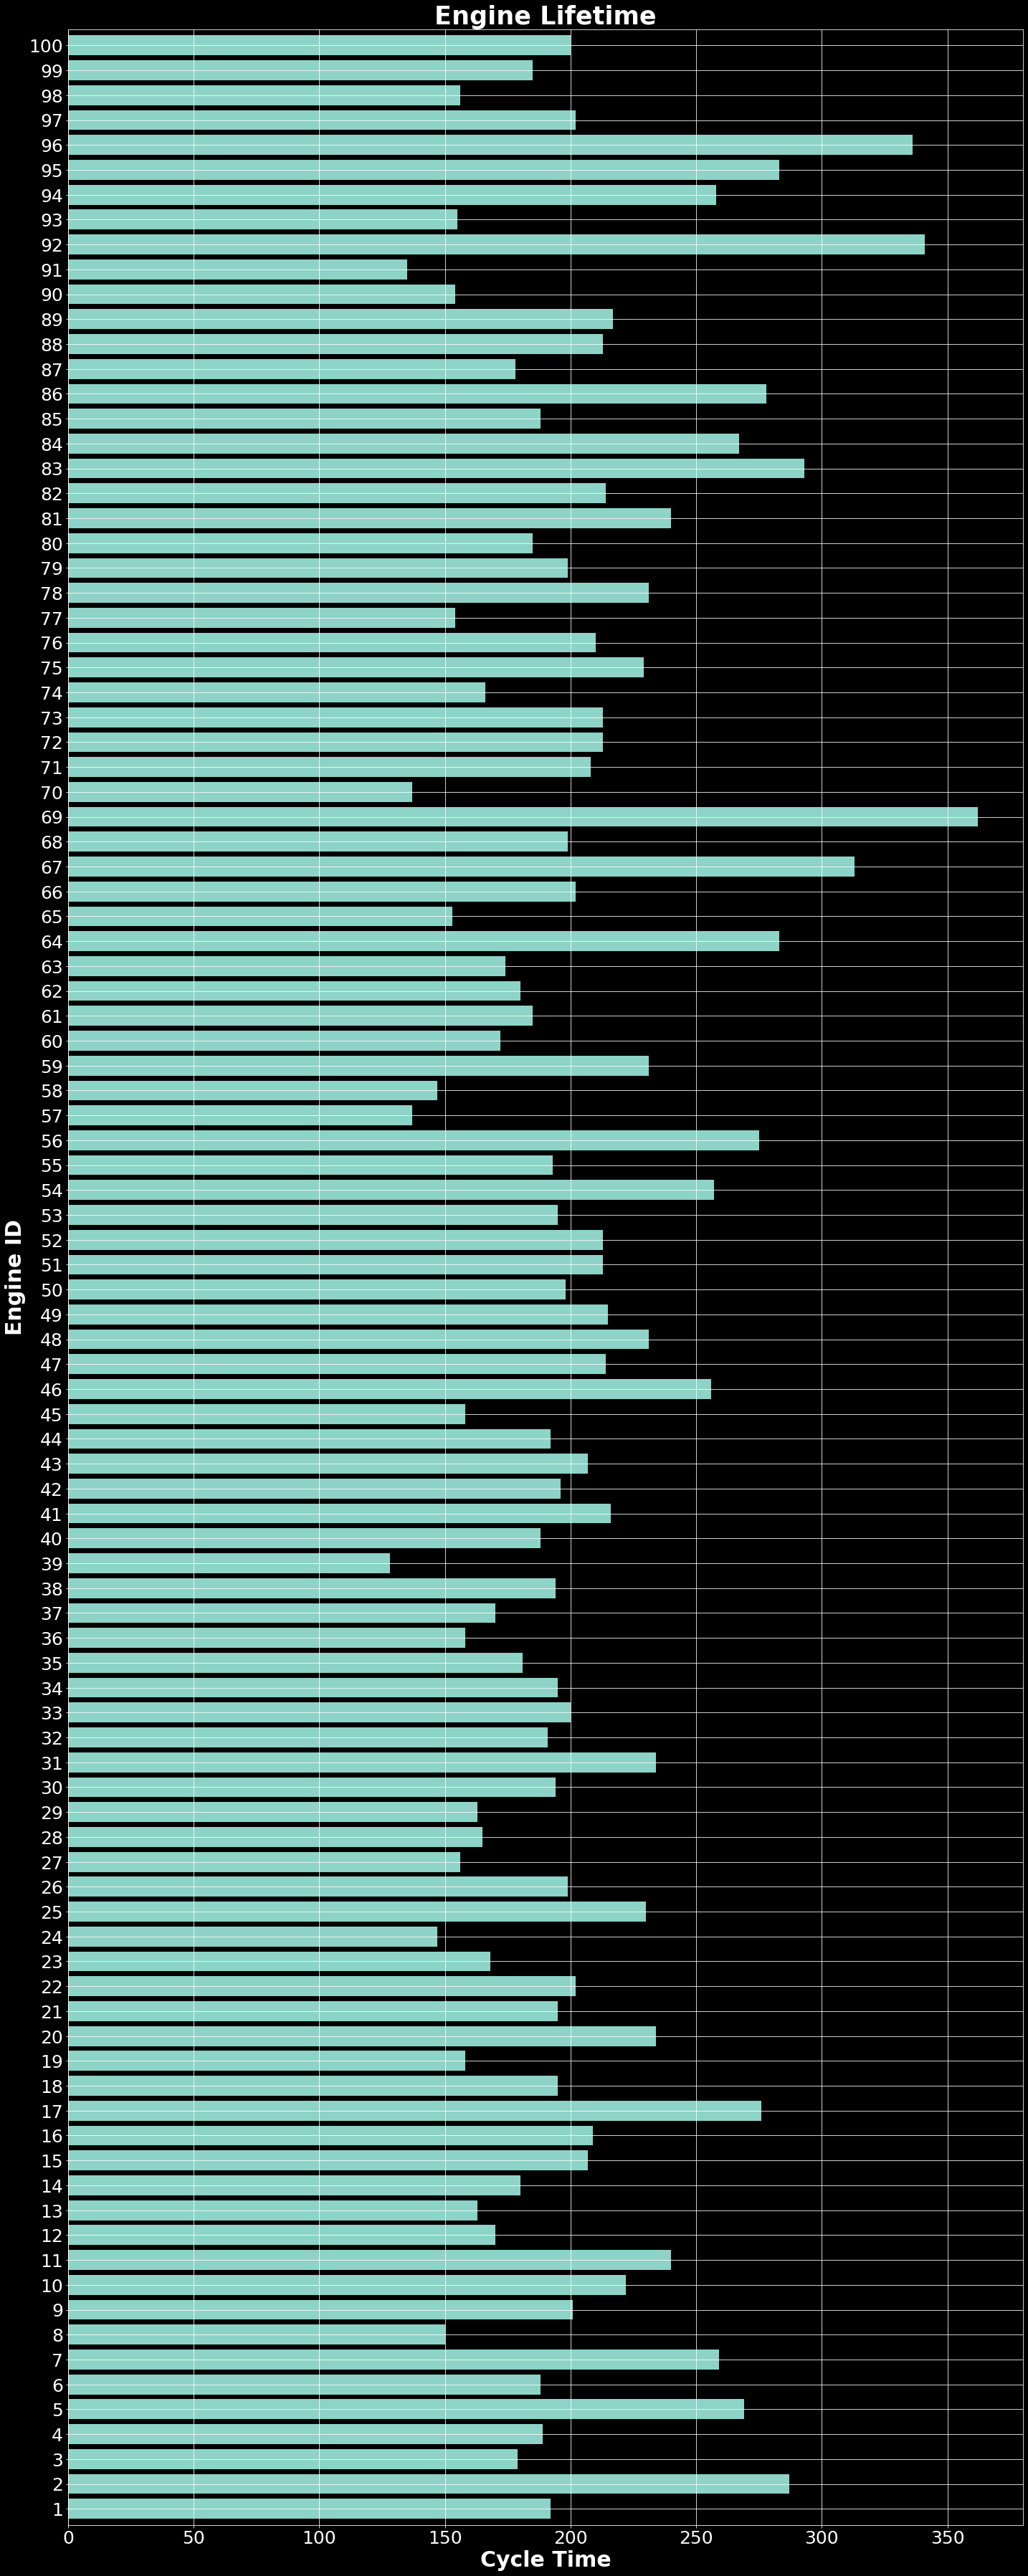

In [50]:
plt.style.use('dark_background')
plt.figure(figsize=(20,50))
ax = df_train.groupby('id')['cycle'].max().plot(kind='barh',width=0.8,stacked = True, align = 'center', rot = 0)
plt.title("Engine Lifetime", fontweight = 'bold', size = 35)
plt.xlabel('Cycle Time', fontweight='bold',size=30)
plt.xticks(size=25)
plt.ylabel('Engine ID',fontweight='bold',size=30)
plt.yticks(size=25)
plt.grid(True)
plt.tight_layout(True)
plt.show()


In [51]:

body = client_80bb5782d084410b9361fad04c8a2f8b.get_object(Bucket='predictivemaintenance-donotdelete-pr-h8iqsdot8jcrsl',Key='PM_truth.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

results = pd.read_csv(body)
results.head()


,0
0,112
1,98
2,69
3,82
4,91


In [52]:
results['id'] = results.index + 1

In [53]:
results.head()

,0,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [54]:
results.columns = ['rul','id']
results.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [55]:
rul = pd.DataFrame(df_test.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id','max']
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [56]:
results['rtf'] = results['rul'] + rul['max']
results.head()

,rul,id,rtf
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [57]:
results.drop(['rul'],axis = 1, inplace = True)

In [58]:
results.head()

,id,rtf
0,1,143
1,2,147
2,3,195
3,4,188
4,5,189


In [59]:
df_test = df_test.merge(results,on='id',how='left')
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rtf
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,143
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,143
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,143
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100,518.67,643.24,1599.45,1415.79,14.62,...,2388.00,8213.28,8.4715,0.03,394,2388,100,38.65,23.1974,218
13092,100,195,-0.0011,-0.0001,100,518.67,643.22,1595.69,1422.05,14.62,...,2388.09,8210.85,8.4512,0.03,395,2388,100,38.57,23.2771,218
13093,100,196,-0.0006,-0.0003,100,518.67,643.44,1593.15,1406.82,14.62,...,2388.04,8217.24,8.4569,0.03,395,2388,100,38.62,23.2051,218
13094,100,197,-0.0038,0.0001,100,518.67,643.26,1594.99,1419.36,14.62,...,2388.08,8220.48,8.4711,0.03,395,2388,100,38.66,23.2699,218


In [60]:
df_test['ttf'] = df_test['rtf']-df_test['cycle']
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,rtf,ttf
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,143,142
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,143,141
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,143,140
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,143,139
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,143,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100,38.65,23.1974,218,24
13092,100,195,-0.0011,-0.0001,100,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100,38.57,23.2771,218,23
13093,100,196,-0.0006,-0.0003,100,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100,38.62,23.2051,218,22
13094,100,197,-0.0038,0.0001,100,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100,38.66,23.2699,218,21


In [61]:
df_test.drop(['rtf'],axis=1,inplace=True)

In [62]:
df_test.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,0.0023,0.0003,100,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100,39.02,23.3916,141
2,1,3,0.0003,0.0001,100,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100,39.08,23.4166,140
3,1,4,0.0042,0.0000,100,518.67,642.44,1584.12,1406.42,14.62,...,2388.05,8132.90,8.3917,0.03,391,2388,100,39.00,23.3737,139
4,1,5,0.0014,0.0000,100,518.67,642.51,1587.19,1401.92,14.62,...,2388.03,8129.54,8.4031,0.03,390,2388,100,38.99,23.4130,138


In [63]:
df_train['ttf'] = df_train.groupby(['id'])['cycle'].transform(max)-df_train['cycle']
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,189
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,187


In [64]:
print(df_train.columns)
print(df_test.columns)

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'ttf'],
      dtype='object')
Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'ttf'],
      dtype='object')


In [65]:
df_train['ttf'].value_counts()

0      100
123    100
121    100
89     100
73     100
      ... 
341      1
356      1
355      1
354      1
351      1
Name: ttf, Length: 362, dtype: int64

In [66]:
train = df_train.copy()
test = df_test.copy()
period = 30
df_train['label_bc'] = df_train['ttf'].apply(lambda x: 1 if x <= period else 0)
df_test['label_bc'] = df_test['ttf'].apply(lambda x: 1 if x <= period else 0)
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100,38.90,23.4044,187,0


In [67]:
df_train['label_bc'].value_counts()

0    17531
1     3100
Name: label_bc, dtype: int64

In [68]:
df_test['label_bc'].value_counts()

0    12764
1      332
Name: label_bc, dtype: int64

In [69]:
features_col_name=['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                   's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
target_col_name='label_bc'

In [70]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_train[features_col_name] = sc.fit_transform(df_train[features_col_name])
df_test[features_col_name] = sc.fit_transform(df_test[features_col_name])

In [71]:
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0


In [72]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [73]:
df_train.iloc[0,:]

id            1.000000
cycle         1.000000
setting1      0.459770
setting2      0.166667
setting3      0.000000
s1            0.000000
s2            0.183735
s3            0.406802
s4            0.309757
s5            0.000000
s6            1.000000
s7            0.726248
s8            0.242424
s9            0.109755
s10           0.000000
s11           0.369048
s12           0.633262
s13           0.205882
s14           0.199608
s15           0.363986
s16           0.000000
s17           0.333333
s18           0.000000
s19           0.000000
s20           0.713178
s21           0.724662
ttf         191.000000
label_bc      0.000000
Name: 0, dtype: float64

In [74]:
x_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [78]:
x_train[0]

array([1.00000000e+00, 1.00000000e+00, 4.59770115e-01, 1.66666667e-01,
       0.00000000e+00, 0.00000000e+00, 1.83734940e-01, 4.06801831e-01,
       3.09756921e-01, 0.00000000e+00, 1.00000000e+00, 7.26247987e-01,
       2.42424242e-01, 1.09755003e-01, 0.00000000e+00, 3.69047619e-01,
       6.33262260e-01, 2.05882353e-01, 1.99607803e-01, 3.63986149e-01,
       0.00000000e+00, 3.33333333e-01, 0.00000000e+00, 0.00000000e+00,
       7.13178295e-01, 7.24661696e-01, 1.91000000e+02])

In [79]:
!pip install ibm_watson_machine_learning

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [80]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey":"_2Cr1-7P6-ZnBRqLRNhlvmEo5XP6GBG1-_qkCuLTXDvM"
}
client = APIClient(wml_credentials)

In [81]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [82]:
space_uid = guid_from_space_name(client, 'models')
print("Space UID = " + space_uid)

Space UID = 80da3fe5-581f-4d4b-9014-6ad2c4abbac0


In [83]:
client.set.default_space(space_uid)

'SUCCESS'

In [84]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [90]:
software_spec_uid = client.software_specifications.get_uid_by_name("default_py3.7_opence")
software_spec_uid

'c2057dd4-f42c-5f77-a02f-72bdbd3282c9'

In [91]:
model_details = client.repository.store_model(model=model,meta_props={
    client.repository.ModelMetaNames.NAME : "Engine_Model",
    client.repository.ModelMetaNames.TYPE : "scikit-learn_0.23",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid    
})
model_id = client.repository.get_model_uid(model_details)

In [92]:
model_id

'7ffd21b5-f98e-4168-b7d4-cc7703fc4cf6'

In [88]:
x_train[0]

array([1.00000000e+00, 1.00000000e+00, 4.59770115e-01, 1.66666667e-01,
       0.00000000e+00, 0.00000000e+00, 1.83734940e-01, 4.06801831e-01,
       3.09756921e-01, 0.00000000e+00, 1.00000000e+00, 7.26247987e-01,
       2.42424242e-01, 1.09755003e-01, 0.00000000e+00, 3.69047619e-01,
       6.33262260e-01, 2.05882353e-01, 1.99607803e-01, 3.63986149e-01,
       0.00000000e+00, 3.33333333e-01, 0.00000000e+00, 0.00000000e+00,
       7.13178295e-01, 7.24661696e-01, 1.91000000e+02])

In [89]:
model.predict([[1.00000000e+00, 1.00000000e+00, 4.59770115e-01, 1.66666667e-01,
       0.00000000e+00, 0.00000000e+00, 1.83734940e-01, 4.06801831e-01,
       3.09756921e-01, 0.00000000e+00, 1.00000000e+00, 7.26247987e-01,
       2.42424242e-01, 1.09755003e-01, 0.00000000e+00, 3.69047619e-01,
       6.33262260e-01, 2.05882353e-01, 1.99607803e-01, 3.63986149e-01,
       0.00000000e+00, 3.33333333e-01, 0.00000000e+00, 0.00000000e+00,
       7.13178295e-01, 7.24661696e-01, 1.91000000e+02]])

array([0], dtype=int64)

# IGNORE CODE BELOW

import joblib
joblib.dump(model,'engine_model.sav')

x_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1:].values

y_predlog = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_predlog,y_test)

### TESTING OUR MODEL  - User input Case

joblib.dump(sc,'MinMax.sav')

minmaxTransform = joblib.load('MinMax.sav')
load_model = joblib.load('engine_model.sav')

sample = minmaxTransform.transform([[0.0011, -0.0001, 100.0, 518.67, 642.61, 1587.78, 1400.70, 14.62, 21.61, 554.31, 2388.05,
                                     9041.12, 1.30, 47.46, 522.28, 2388.05, 8128.59, 8.4099, 0.03, 392, 2388, 100.00, 39.00,
                                     23.3325]])

sample

eid = 1
cyc = 20
timetf = 123
example = [[eid,cyc,sample[0][0], sample[0][1], sample[0][2], sample[0][3], sample[0][4],
             sample[0][5], sample[0][6], sample[0][7], sample[0][8], sample[0][9],
             sample[0][10], sample[0][11], sample[0][12], sample[0][13], sample[0][14],
             sample[0][15], sample[0][16], sample[0][17], sample[0][18], sample[0][19],
             sample[0][20], sample[0][21], sample[0][22], sample[0][23], timetf ]]
x = load_model.predict(example)
print(x)